# Housing Valuation Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
housing_data = pd.read_csv("housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis

In [4]:
housing_data.shape

(20640, 10)

In [5]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
print("Percentage of Null value")
housing_data.isnull().sum()/housing_data.shape[0]*100

Percentage of Null value


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [10]:
# Dropping the null columns as the percentage is very low

In [11]:
housing_data.dropna(inplace = True)
housing_data.shape

(20433, 10)

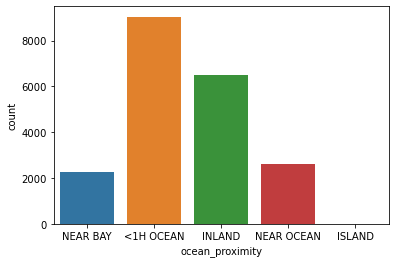

In [12]:
sns.countplot(housing_data['ocean_proximity'])
plt.show()

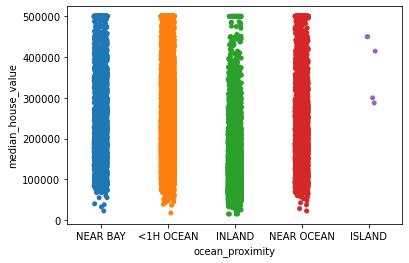

In [13]:
sns.stripplot(y = housing_data['median_house_value'], x = housing_data['ocean_proximity'])
plt.show()

In [14]:
# Data Correlation

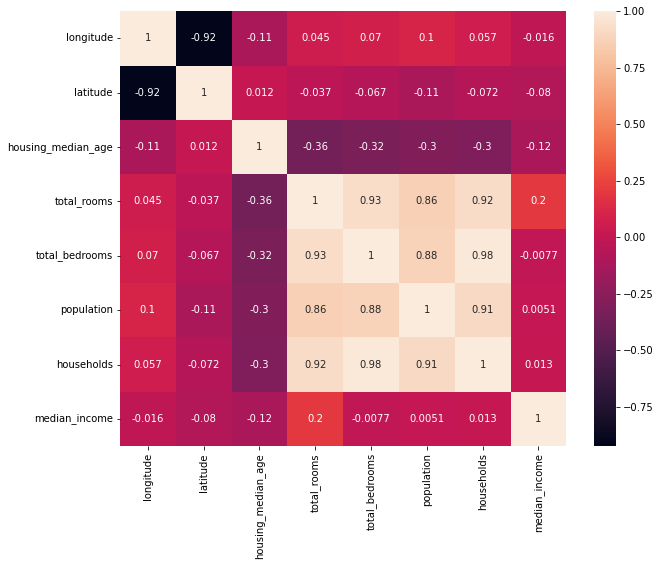

In [15]:
plt.figure(figsize = (10,8))

sns.heatmap(housing_data.iloc[:,:-2].corr(), annot = True)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X = housing_data.iloc[ :, :-2]

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

print(vif)

   VIF_Factor            Features
0  615.913539           longitude
1  549.460506            latitude
2    7.280281  housing_median_age
3   30.511021         total_rooms
4   93.969627      total_bedrooms
5   16.431328          population
6   91.444123          households
7    8.258816       median_income


In [18]:
# The variables 'longitude','total_rooms','households' are being dropped to reduce correlation
# The variables are selected on the basis of vif value followed by trail and error approach of different combinations

In [19]:
housing_data2 = housing_data.drop(['longitude','total_rooms','households'], axis = 1)
housing_data2.head()

,latitude,housing_median_age,total_bedrooms,population,median_income,median_house_value,ocean_proximity
0,37.88,41.0,129.0,322.0,8.3252,452600.0,NEAR BAY
1,37.86,21.0,1106.0,2401.0,8.3014,358500.0,NEAR BAY
2,37.85,52.0,190.0,496.0,7.2574,352100.0,NEAR BAY
3,37.85,52.0,235.0,558.0,5.6431,341300.0,NEAR BAY
4,37.85,52.0,280.0,565.0,3.8462,342200.0,NEAR BAY


In [20]:
X = housing_data2.iloc[ :, :-2]

vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

print(vif)

   VIF_Factor            Features
0   15.190016            latitude
1    6.721386  housing_median_age
2   11.715377      total_bedrooms
3   11.221158          population
4    5.033052       median_income


In [21]:
# Variable distribution

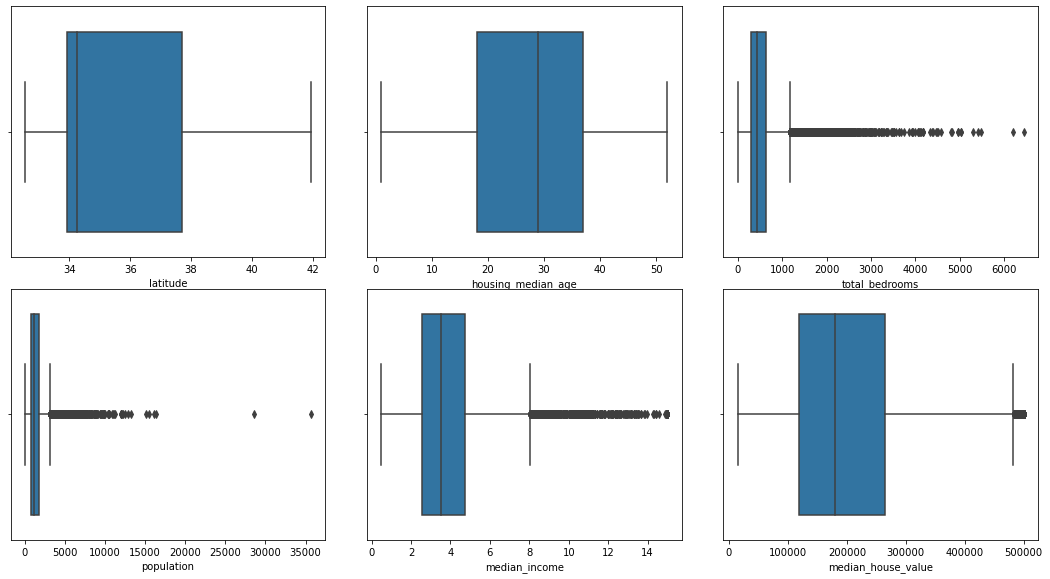

In [22]:
df_num = housing_data2.select_dtypes(np.number)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))
plt.tight_layout()

for var, subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[var], ax = subplot)

In [23]:
# Treating the outliers

In [24]:
housing_data2.shape

(20433, 7)

In [25]:
q1 = housing_data2.quantile(0.25)
q3 = housing_data2.quantile(0.75)

iqr = q3-q1

In [26]:
housing_data3 = housing_data2[~((housing_data2 < (q1 - 1.5*iqr)) | (housing_data2 > (q3 + 1.5*iqr))).any(axis=1)]
housing_data3.shape

(17617, 7)

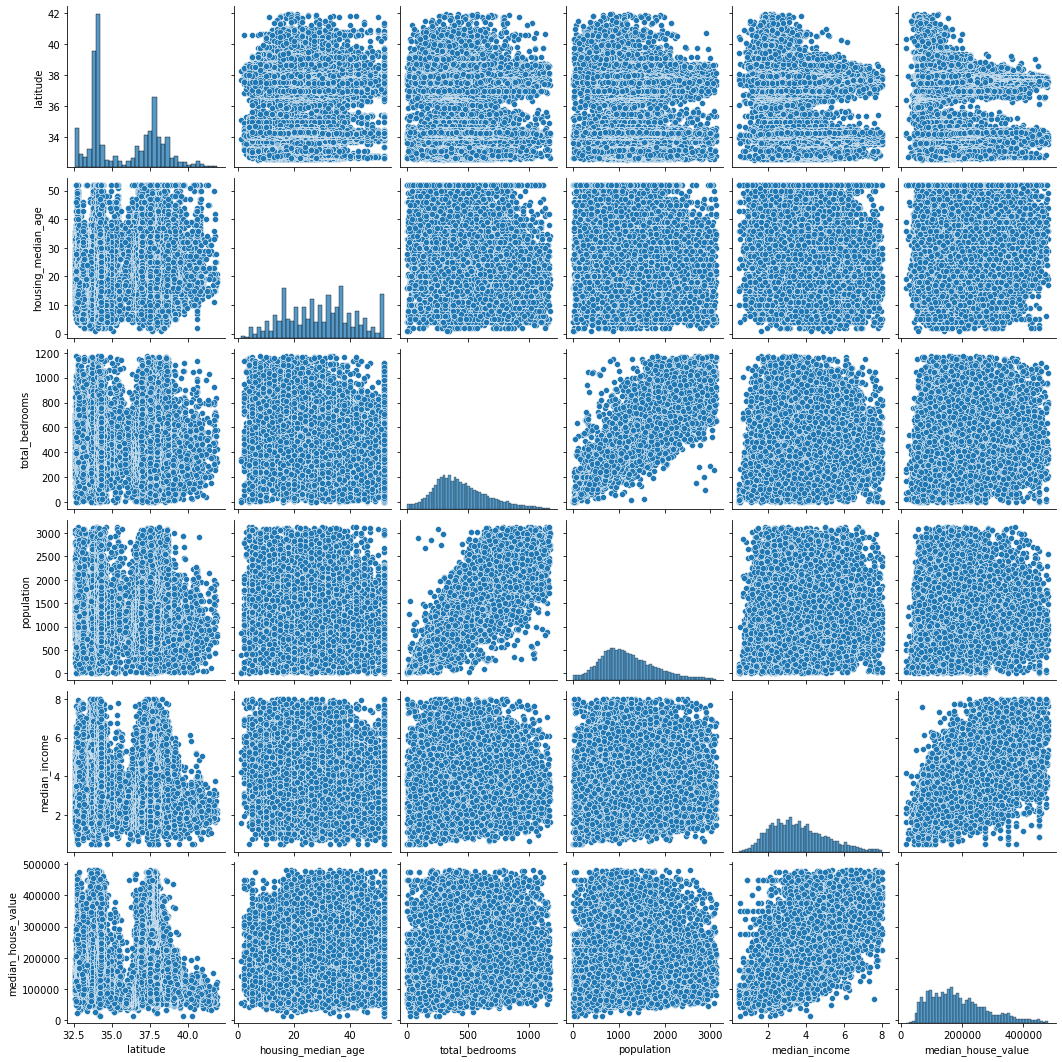

In [27]:
sns.pairplot(housing_data3)
plt.show()

In [28]:
# The variables except latitude are close to normal distribution
# Some of the variables are right skewwed

# Train Test Split

In [29]:
df_num = housing_data3.select_dtypes(include = np.number)

df_cat = housing_data3.select_dtypes(include = 'object')

df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat.head()

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0


In [30]:
# Standardizing the data

In [31]:
df_num = df_num.apply(lambda x: (x - x.mean())/x.std(), axis = 0)

In [32]:
housing_data4 = pd.concat([df_num, df_cat], axis= 1)
housing_data4.head()

,latitude,housing_median_age,total_bedrooms,population,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0.993015,1.847017,-1.147800,-1.159038,2.519051,1.746460,0,0,1,0
3,0.993015,1.847017,-0.950158,-1.058726,1.408975,1.631639,0,0,1,0
4,0.993015,1.847017,-0.752516,-1.047401,0.173334,1.641208,0,0,1,0
5,0.993015,1.847017,-1.046783,-1.293327,0.304400,0.870417,0,0,1,0
6,0.988399,1.847017,0.165421,-0.191513,0.044674,1.184049,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = housing_data4.drop('median_house_value', axis= 1)
y = housing_data4['median_house_value']
                  
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

In [50]:
print("The r2_score of the train data is:", round(r2_score(y_train, y_pred_train),2))
print("The r2_score of the test data is:", round(r2_score(y_test, y_pred_test),2))

The r2_score of the train data is: 0.6
The r2_score of the test data is: 0.61


In [51]:
print("The MAE of the train data is:", round(mean_absolute_error(y_train, y_pred_train),2))
print("The MAE of the test data is:", round(mean_absolute_error(y_test, y_pred_test),2))

The MAE of the train data is: 0.47
The MAE of the test data is: 0.46


In [52]:
# The model has R squre of 0.6 which is a reasonable fit for a base model

# Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
decision_tree = DecisionTreeRegressor(random_state=10)
decision_tree = decision_tree.fit(X_train, y_train)

In [60]:
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

In [61]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)

In [63]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [64]:
print("The r2_score of the train data is:", round(r2_score(y_train, y_pred_train),2))
print("The r2_score of the test data is:", round(r2_score(y_test, y_pred_test),2))

The r2_score of the train data is: 0.96
The r2_score of the test data is: 0.71


In [65]:
print("The MAE of the train data is:", round(mean_absolute_error(y_train, y_pred_train),2))
print("The MAE of the test data is:", round(mean_absolute_error(y_test, y_pred_test),2))

The MAE of the train data is: 0.14
The MAE of the test data is: 0.38


# Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr_model = RandomForestRegressor()
rfr_model = rfr_model.fit(X_train, y_train)

In [69]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [70]:
print("The r2_score of the train data is:", round(r2_score(y_train, y_pred_train),2))
print("The r2_score of the test data is:", round(r2_score(y_test, y_pred_test),2))

The r2_score of the train data is: 0.96
The r2_score of the test data is: 0.71


In [71]:
print("The MAE of the train data is:", round(mean_absolute_error(y_train, y_pred_train),2))
print("The MAE of the test data is:", round(mean_absolute_error(y_test, y_pred_test),2))

The MAE of the train data is: 0.14
The MAE of the test data is: 0.38


# Fine tuning using GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_paramaters = [{'max_depth': range(5, 50, 5),  
                     'max_leaf_nodes' : range(5, 50, 5),
                     'min_samples_leaf' : range(5, 50, 5),
                     'min_samples_split': range(5, 50, 5)}]

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = tuned_paramaters, cv = 5)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

In [ ]:
rf_tuned_model = RandomForestRegressor(max_depth = rf_grid.best_params_['max_depth'],
                                       max_features = rf_grid.best_params_['max_features'],
                                       max_leaf_nodes = rf_grid.best_params_['max_leaf_nodes'],
                                       max_samples = rf_grid.best_params_['max_samples'],
                                       min_samples_leaf = rf_grid.best_params_['min_samples_leaf'],
                                       min_samples_split = rf_grid.best_params_['min_samples_split'])

rf_tuned_model.fit(X_train, y_train)

In [ ]:
y_pred_train = rf_tuned_model.predict(X_trian)
y_pred_test = rf_tuned_model.predict(X_test)

In [ ]:
print("The r2_score of the train data is:", round(r2_score(y_train, y_pred_train),2))
print("The r2_score of the test data is:", round(r2_score(y_test, y_pred_test),2))

In [ ]:
print("The MAE of the train data is:", round(mean_absolute_error(y_train, y_pred_train),2))
print("The MAE of the test data is:", round(mean_absolute_error(y_test, y_pred_test),2))